In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_master = pd.read_csv('GOLD_H4.csv')
df = df_master.drop(['volume'], axis=1).copy()
df['time'] = pd.to_datetime(df.time)

df.isna().sum().sum()

#Feature Create

import ta
df['rsi14'] = ta.momentum.rsi(df.close, n=14)
df['rsi14-t1'] = df['rsi14'].shift(1)

df['bbh'] = ta.volatility.bollinger_hband(df['close']) - df['close']
df['bbh-t1'] = df['bbh'].shift(1) 

df['open-close'] = df.open - df.close
df['open-close-t1'] = df['open-close'].shift(1)

df['high-low'] = df.high - df.low
df['high-low-t1'] = df['high-low'].shift(1)

df['label'] = (df.close.rolling(5, center=True).mean().diff() > 0).astype(int)

df.dropna(inplace=True)

In [2]:
df.isna().sum().sum()

0

In [3]:
import DeeperTradeLibrary as dpt

df_train = df.iloc[:15000, :].copy()
df_test = df.iloc[15000:, :].copy()

X_train = df_train.loc[:, 'rsi14':'high-low-t1'].copy()
y_train = df_train['label']

X_test = df_test.loc[:, 'rsi14':'high-low-t1'].copy()
y_test = df_test['label']

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train);

y_pred = model.predict(X_test) 

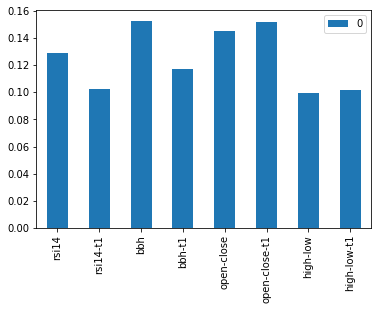

In [4]:
pd.DataFrame(model.feature_importances_, X_test.columns).plot.bar()

In [5]:
df_test['signal'] = y_pred

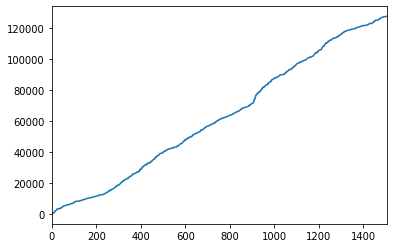

In [6]:
pred = model.predict(X_train)
df_train['signal'] = pred

dpt.Backtest.trade_simulation(df_train).equity.plot()

In [7]:
accuracy_score(y_train, pred)

1.0

In [8]:
accuracy_score(y_test, y_pred)

0.7013487475915221

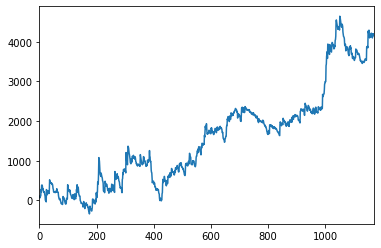

In [9]:
dpt.Backtest.trade_simulation(df_test).equity.plot()